<a href="https://colab.research.google.com/github/Aya-shawky/CS231n-Deep-Learning-for-Computer-Vision/blob/main/Implement_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## First way to read cifar data

In [1]:
!pip install opendatasets

import opendatasets as od
od.download("https://www.kaggle.com/datasets/pankrzysiu/cifar10-python")

In [219]:
import numpy as np
import pickle

class cifar_data_loader():
  def __init__(self, dir):
    self.dir = "/content/cifar10-python/cifar-10-batches-py/"
    self.files = ['data_batch_2', 'data_batch_3','data_batch_4','data_batch_5']

  def unpickle(self, file):
      with open(file, 'rb') as fo:
          dict = pickle.load(fo, encoding='bytes')
      return dict

  def read_data(self):
    data = self.unpickle( self.dir + "data_batch_1")
    X_trian = data[b'data']
    y_trian = data[b'labels']
    y_trian = np.array(y_trian)

    for file in self.files:
      data = self.unpickle( self.dir + file)
      X_temp = data[b'data']
      X_trian = np.append(X_trian ,X_temp ,axis = 0)
      y_trian = np.append(y_trian ,np.array(data[b'labels']) ,axis = 0)

    data = self.unpickle( self.dir + "test_batch")
    X_test = data[b'data']
    y_test = np.array(data[b'labels'])

    return X_trian , y_trian , X_test  , y_test


In [220]:
data_loader = cifar_data_loader("/content/cifar10-python/cifar-10-batches-py")
X_trian , y_trian , X_test  , y_test = data_loader.read_data()

In [221]:
print(f"""X train shape: {x_train.shape}
y train shape: {y_train.shape}
------
X test shape: {x_test.shape}
y test shape: {y_test.shape}""")

((50000, 3072), (50000,))

In [ ]:
labels = {0:'airplane',
1:'automobile',
2:'bird'	,
3:'cat'		,
4:'deer'	,
5:'dog'		,
6:'frog'	,
7:'horse'	,
8:'ship'	,
9:'truck',}

## Easy way to read cifar data

In [85]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
from scipy import stats

In [158]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

x_train = x_train.astype('float32')/255
x_train = x_train.reshape(50000, -1)

x_test = x_test.astype('float32')/255
x_test = x_test.reshape(10000, -1)

#y_train = to_categorical(y_train, 10)
#y_test = to_categorical(y_test, 10)

In [198]:
labels = {0:'airplane',
1:'automobile',
2:'bird'	,
3:'cat'		,
4:'deer'	,
5:'dog'		,
6:'frog'	,
7:'horse'	,
8:'ship'	,
9:'truck',}

In [159]:
print(f"""X train shape: {x_train.shape}
y train shape: {y_train.shape}
------
X test shape: {x_test.shape}
y test shape: {y_test.shape}""")

X train shape: (50000, 3072) 
y train shape: (50000, 1)
------
X test shape: (10000, 3072) 
y test shape: (10000, 1)


# Implement KNN model from scratch

In [200]:
import numpy as np

class KNN():
  def __init__(self , k):
    self.k = k

  def train(self, X , y):
    x_train = X
    y_train = y
    print("No training phase, Just keep data")

  def predict(self, x_sample):
    y_pred = []
    distance = ((x_train - x_sample)**2).sum(axis = 1)
    nearest = distance.argsort()[:self.k]
    y_pred = [ y_train[indx] for indx in nearest ]
    return stats.mode(y_pred).mode[0]

In [201]:
knn = KNN(5)

In [202]:
knn.train(x_train , y_train)

No training phase, Just keep data


<ipython-input-217-2fbe05118f26>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  truth = int(y_test[indx])


1 || lable: 0 || predict 0 || True
2 || lable: 2 || predict 8 || False
3 || lable: 0 || predict 4 || False
4 || lable: 8 || predict 8 || True
5 || lable: 7 || predict 2 || False
6 || lable: 7 || predict 7 || True


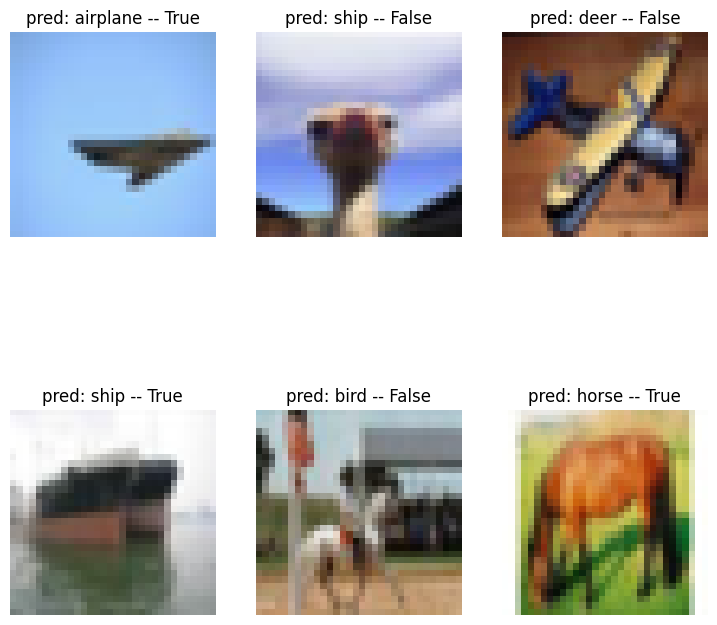

In [217]:
import random
import matplotlib.pyplot as plt

plt.figure(figsize=(9,9))
randomlist = random.sample(range(0, 10000), 6)

for i , indx in enumerate(randomlist):
  pred = int(knn.predict(x_test[indx]))
  truth = int(y_test[indx])
  print(f"{i+1} || lable: {truth} || predict {pred} || {pred == truth}")
  plt.subplot(2,3,i+1)
  plt.imshow(x_test[indx].reshape(32,32,3))
  plt.title(f'pred: {labels[pred]} -- {pred == truth}')
  plt.axis('off')


## Use KNN from sklearn

In [223]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [228]:
pred = [ int(knn.predict([x_test[indx]])) for indx in randomlist ]

<ipython-input-228-0aff3d578177>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred = [ int(knn.predict([x_test[indx]])) for indx in randomlist ]
<ipython-input-228-0aff3d578177>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred = [ int(knn.predict([x_test[indx]])) for indx in randomlist ]
<ipython-input-228-0aff3d578177>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred = [ int(knn.predict([x_test[indx]])) for indx in randomlist ]
<ipython-input-228-0af

1 || lable: 0 || predict 0 || True
2 || lable: 2 || predict 8 || False
3 || lable: 0 || predict 4 || False
4 || lable: 8 || predict 8 || True
5 || lable: 7 || predict 2 || False
6 || lable: 7 || predict 7 || True


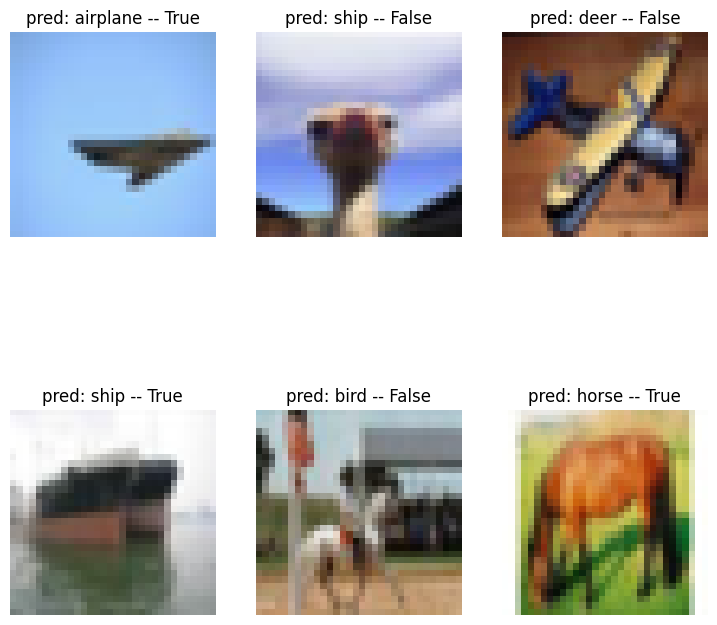

In [229]:
plt.figure(figsize=(9,9))
#randomlist = random.sample(range(0, 10000), 6)

for i , indx in enumerate(randomlist):
  truth = int(y_test[indx])
  print(f"{i+1} || lable: {truth} || predict {pred[i]} || {pred[i] == truth}")
  plt.subplot(2,3,i+1)
  plt.imshow(x_test[indx].reshape(32,32,3))
  plt.title(f'pred: {labels[pred[i]]} -- {pred[i] == truth}')
  plt.axis('off')

# **WOW! the same performance =)**

**Thinking**:

what about using **gray images** as an input dose this make any improvements?